<p float="center">
  <img width="1700" height="80" src="https://i.postimg.cc/0QrZGTtm/Accessories-2.png">
</p>
<center><img src="https://images.unsplash.com/photo-1451481454041-104482d8e284?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1700&q=80" 
             style='border-radius:10px'></center>
       

In [1]:
import os
import warnings 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.io as pio

import colorama
from colorama import Fore, Style
warnings.simplefilter(action='ignore', category=FutureWarning)
print(Fore.MAGENTA + "All Libraries Imported Successfully!")

All Libraries Imported Successfully!


# Data

In [2]:
life_exp_df = pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Life expectancy.csv")
suicidal_rate_df = pd.read_csv("/kaggle/input/suicide-rate-and-life-expectancy/Suicide Rate.csv")

# Explore Life Data

In [3]:
life_exp_df.head(5).style.background_gradient(cmap='Spectral') #We can use head, tail and sample to explore our dataset.

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.600000,68.200000,3.794000,4.700000
1,Albania,74.800000,81.300000,4.959000,1.700000
2,Algeria,73.300000,78.900000,5.605000,2.900000
3,Andorra,81.700000,84.800000,6.955000,1.400000
4,Angola,58.100000,65.600000,4.105000,5.300000


In [4]:
life_exp_df.sample(5).style.background_gradient(cmap='gist_earth_r') #We can use head, tail and sample to explore our dataset.

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
84,Jordan,74.600000,78.600000,5.081000,3.200000
48,Dominica,74.500000,79.200000,6.175000,2.100000
78,Iraq,72.300000,77.000000,4.739000,3.900000
22,Botswana,62.400000,69.900000,4.517000,3.100000
55,Estonia,74.600000,81.600000,6.899000,1.600000


In [5]:
# Null Value Percentage Per column
percent_missing = life_exp_df.isnull().sum() * 100 / len(life_exp_df)
missing_value_df = pd.DataFrame({'column_name': life_exp_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False).style.background_gradient(cmap='Accent')

,column_name,percent_missing
Country,Country,0.000000
Life Expectancy (years) - Men,Life Expectancy (years) - Men,0.000000
Life Expectancy (years) - Women,Life Expectancy (years) - Women,0.000000
Happiness Score,Happiness Score,0.000000
Fertility Rate (births per woman),Fertility Rate (births per woman),0.000000


In [6]:
life_exp_df.dtypes

Country                               object
Life Expectancy (years) - Men        float64
Life Expectancy (years) - Women      float64
Happiness Score                      float64
Fertility Rate (births per woman)    float64
dtype: object

# Explore Suicides Data

In [7]:
suicidal_rate_df.head(5).style.background_gradient(cmap='Spectral') #We can use head, tail and sample to explore our dataset.

,Country,GDP per capita,Suicide rate
0,Afghanistan,"1,105",20.600000
1,Albania,"4,932",32.400000
2,Algeria,"4,534",15.600000
3,Andorra,"46,622",18.900000
4,Angola,"2,077",20.500000


In [8]:
suicidal_rate_df.tail(5).style.background_gradient(cmap='Spectral') #We can use head, tail and sample to explore our dataset.

,Country,GDP per capita,Suicide rate
135,Spain,"29,542",11.500000
136,Switzerland,"83,832",12.900000
137,United Kingdom,"39,720",11.100000
138,United States,"65,112",14.000000
139,Thailand,"6,792",27.800000


In [9]:
# Null Value Percentage Per column
percent_missing = suicidal_rate_df.isnull().sum() * 100 / len(suicidal_rate_df)
missing_value_df = pd.DataFrame({'column_name': suicidal_rate_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False).style.background_gradient(cmap='Accent')

,column_name,percent_missing
Country,Country,0.000000
GDP per capita,GDP per capita,0.000000
Suicide rate,Suicide rate,0.000000


# Exploratory Data Analysis Part One

In [10]:
plt.style.use('fivethirtyeight')

In [11]:
life_exp_df.head()

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3


# Radial bar chart

In [12]:
df1 = life_exp_df
# .sort_values('Happiness Score', ascending = False).head(144) 
# You can add this line of code at end of first line to sort values in chart below, it's optional and also you can use head function to specify values...

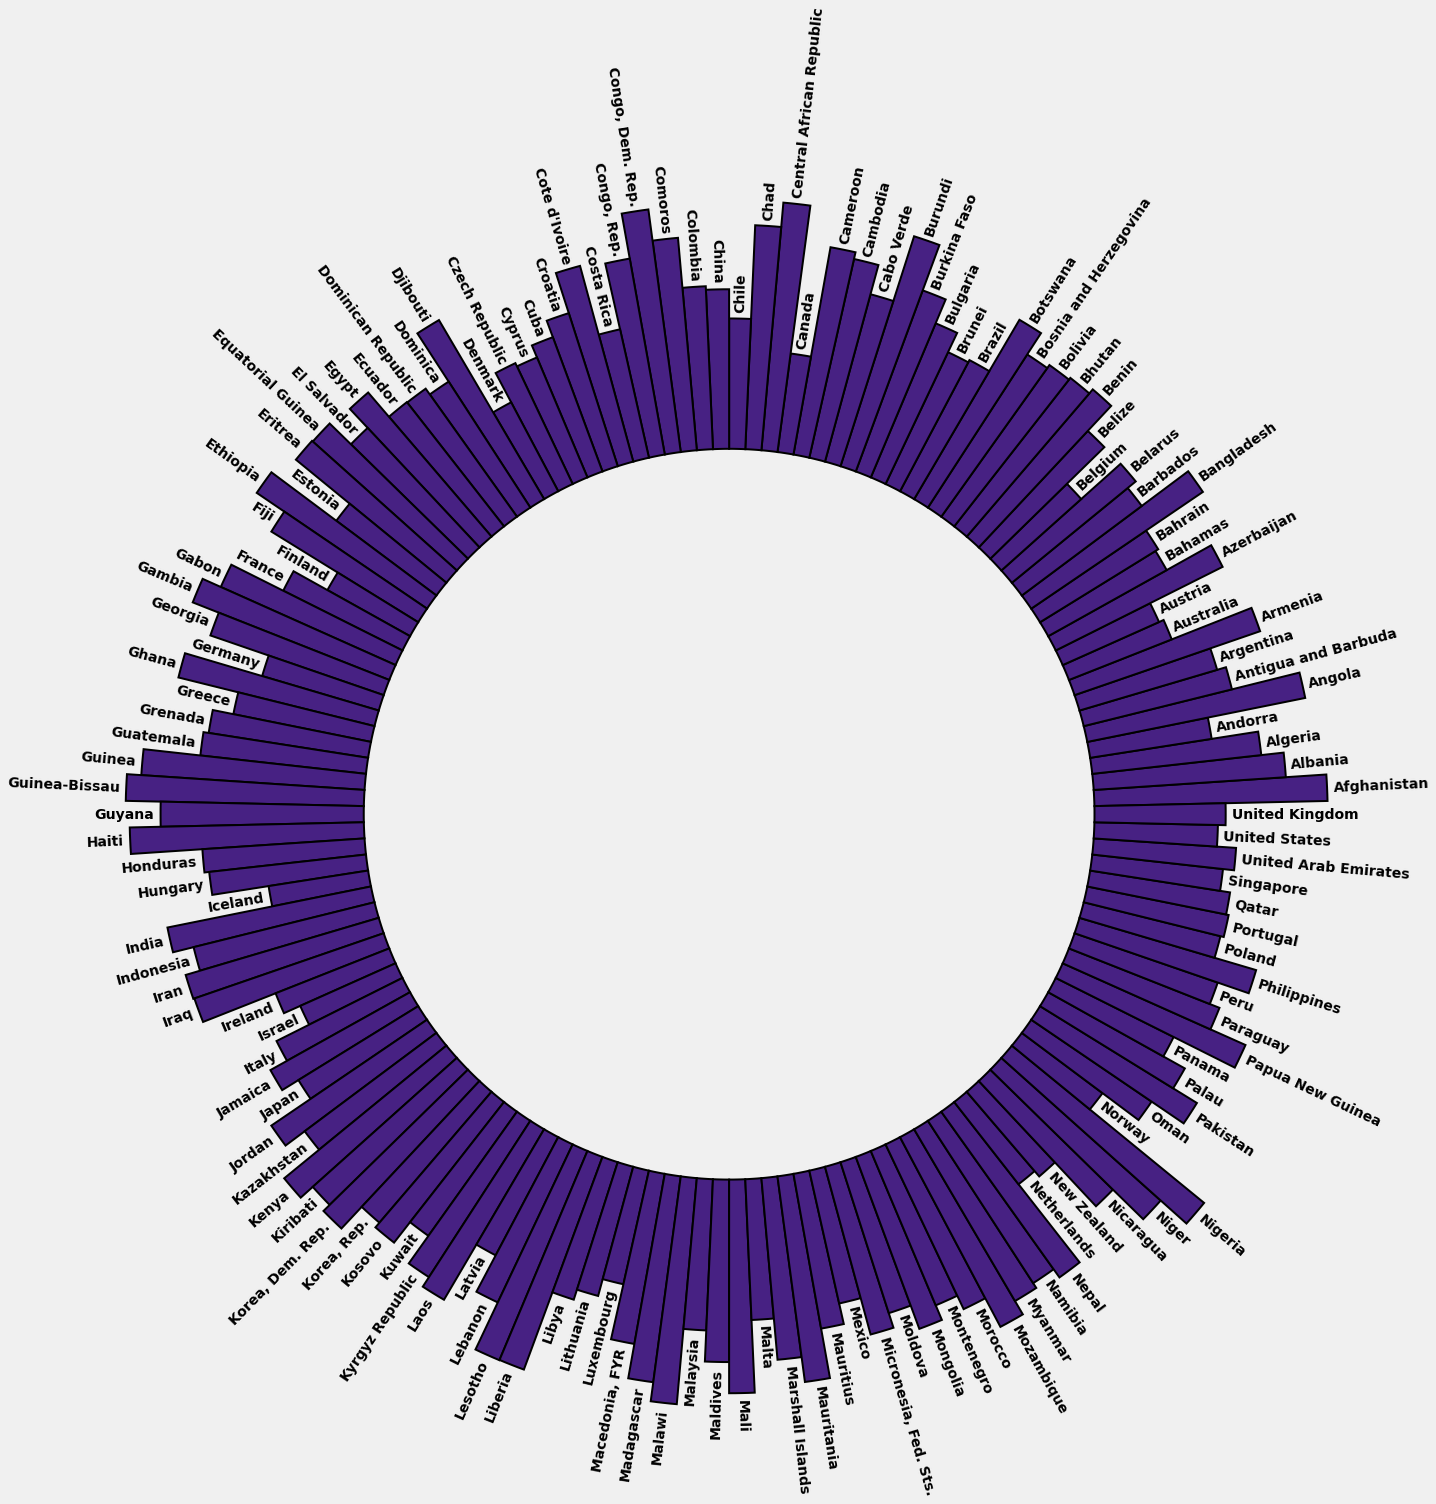

In [13]:
# set figure size
plt.figure(figsize=(20,24))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df1['Happiness Score'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df1['Happiness Score'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df1.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df1.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color="#472183",
)

# little space between the bar and the label
labelPadding = 0.5

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df1["Country"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    plt.rcParams["font.weight"] = 'bold'
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [14]:
df2 = life_exp_df
# .sort_values('Life Expectancy (years) - Men', ascending = False).head(120)
# You can add this line of code at end of first line to sort values in chart below, it's optional and also you can use head function to specify values...

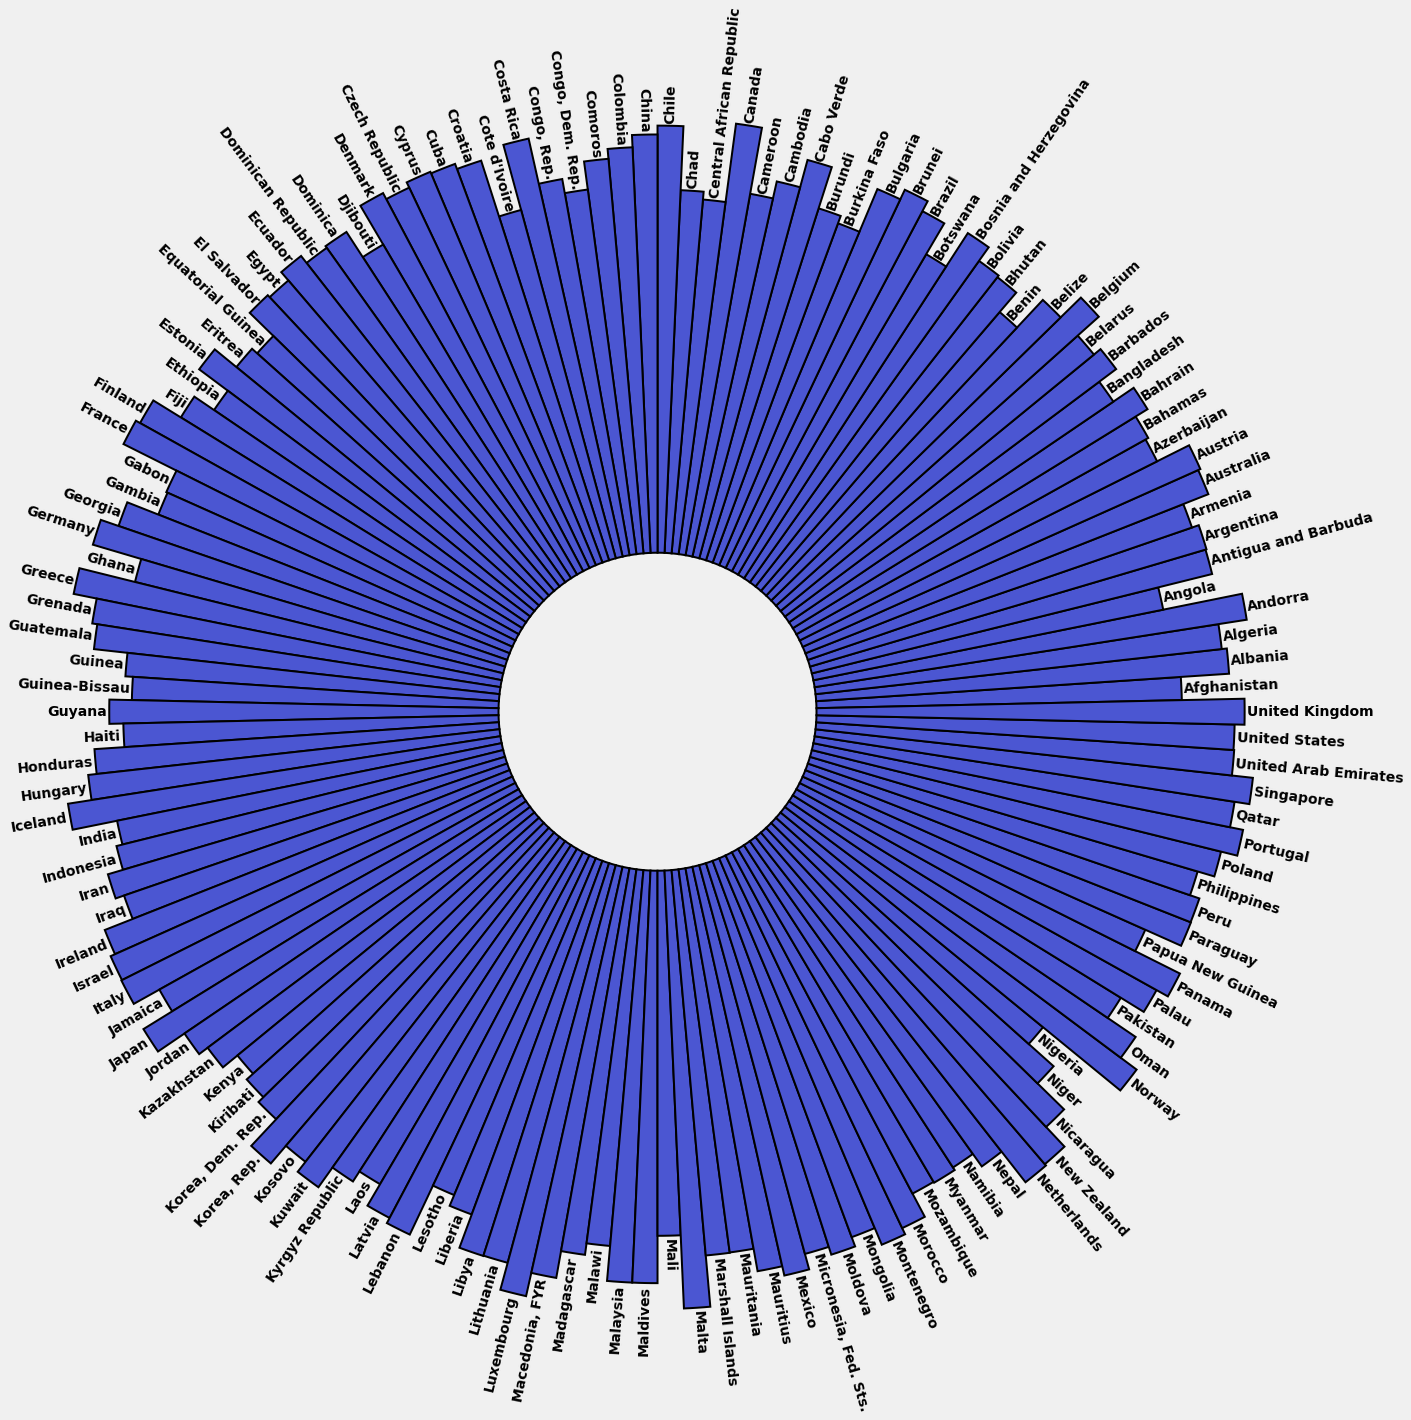

In [15]:
# set figure size
plt.figure(figsize=(20,24))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df2['Life Expectancy (years) - Men'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df2['Life Expectancy (years) - Men'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df2.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df2.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color="#4B56D2",
)

# little space between the bar and the label
labelPadding = 0.5

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df2["Country"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    plt.rcParams["font.weight"] = 'bold'
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [16]:
df3 = life_exp_df
# .sort_values('Life Expectancy (years) - Women', ascending = False).head(120)
# You can add this line of code at end of first line to sort values in chart below, it's optional and also you can use head function to specify values...

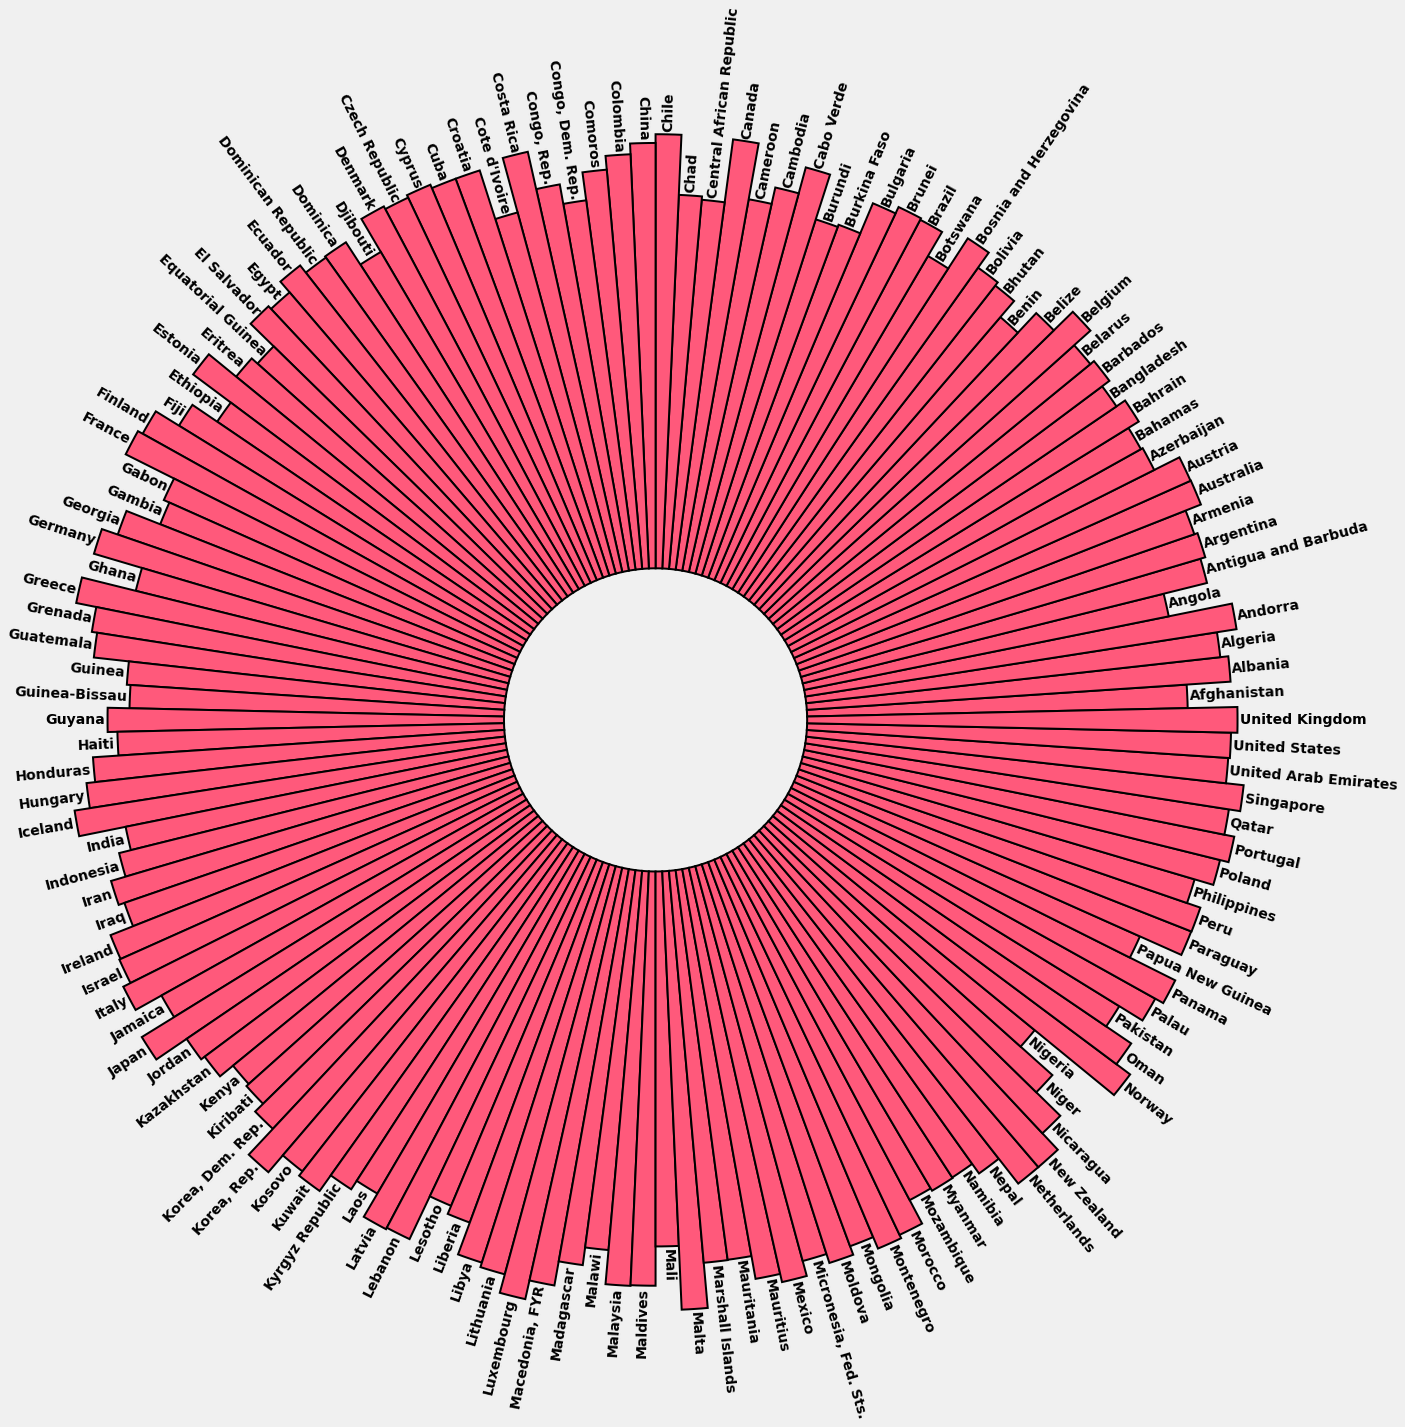

In [17]:
# set figure size
plt.figure(figsize=(20,24))
ax = plt.subplot(111, polar=True)
plt.axis('off')


# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df3['Life Expectancy (years) - Women'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df3['Life Expectancy (years) - Women'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df3.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df3.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="black",
    color="#FF597B",
)

# little space between the bar and the label
labelPadding = 0.5

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df3["Country"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    plt.rcParams["font.weight"] = 'bold'
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [18]:
df1

,Country,Life Expectancy (years) - Men,Life Expectancy (years) - Women,Happiness Score,Fertility Rate (births per woman)
0,Afghanistan,60.6,68.2,3.794,4.7
1,Albania,74.8,81.3,4.959,1.7
2,Algeria,73.3,78.9,5.605,2.9
3,Andorra,81.7,84.8,6.955,1.4
4,Angola,58.1,65.6,4.105,5.3
...,...,...,...,...,...
137,Qatar,78.1,82.5,6.420,2.3
138,Singapore,82.5,85.9,6.710,1.2
139,United Arab Emirates,76.3,80.6,6.390,2.6
140,United States,76.1,81.1,6.940,1.7


In [19]:
fig = px.scatter(df1, x="Life Expectancy (years) - Men", y="Life Expectancy (years) - Women", color="Happiness Score", size_max=35,
                 size='Happiness Score', template = 'plotly_white', hover_data=['Country', 'Life Expectancy (years) - Men', 'Life Expectancy (years) - Women', 'Happiness Score', 'Fertility Rate (births per woman)'],
                 title='Scatter Plot Cross Life Expectancy Men and Women')
fig.show()

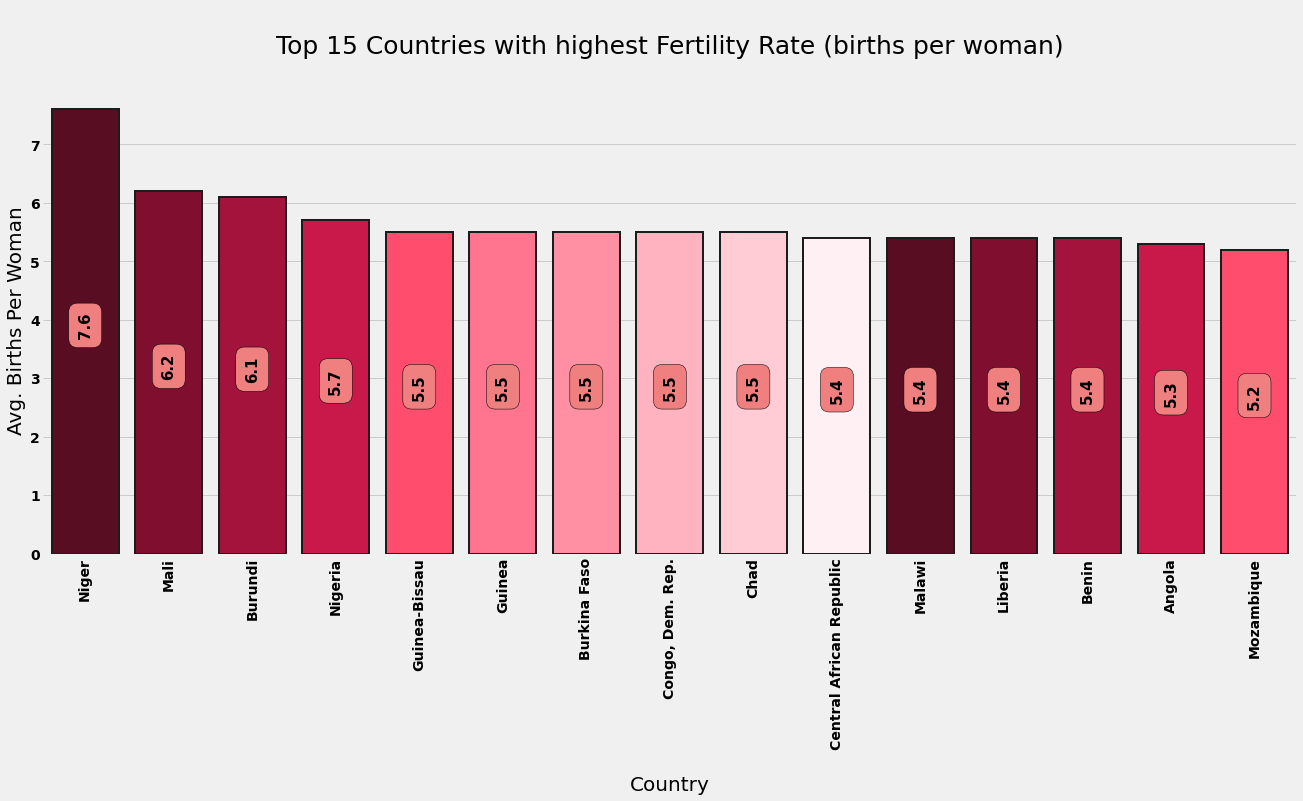

In [32]:
palette = ["#590d22","#800f2f","#a4133c","#c9184a","#ff4d6d","#ff758f","#ff8fa3","#ffb3c1","#ffccd5","#fff0f3"]
top_df = df1.sort_values('Fertility Rate (births per woman)', ascending = False)
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_df["Country"].head(15),y=top_df["Fertility Rate (births per woman)"].head(15),palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop 15 Countries with highest Fertility Rate (births per woman)\n", fontsize=25)
plt.ylabel("Avg. Births Per Woman" , fontsize = 20)
plt.xlabel("\nCountry" , fontsize = 20)
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center", padding = 6, size = 15, color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "#f08080", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()